## Data Analysis with pandas

We are going to examine data from the [Bangalore Open Data Repository](https://github.com/openbangalore/bangalore). Bangalore is the 3rd most populous city in India and widely regarded as the Silicon Valley of India.

### Task 1 - Load Data

- Read in the data to pandas
- Check the shape of the dataframe
- Check the summary statistics of the dataframe
- Change the row index to the "Year" column

In [ ]:
import pandas as pd

df = pd.read_csv('bangalore_temparature.tsv', delimiter='\t')
df_r, df_c = df.shape
print(df_r, df_c)
df.describe()
print(df.index)
df=df.reset_index()
df=df.set_index(df.Year)
print(df.index)
print(df.columns)
print(df.head(4))
print(df.dtypes)

### Task 2 - Initial Data Analysis

- (Chart) How does temperature vary over the year (X-axis is months)?
- (Chart) How does temperature vary over the years (X-axis is years)?
- What were the highest, lowest and mean values in 1960?
- Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
- Which months had the highest and lowest gains in temperature?
- Make a histogram, KDE plot and bar plot of the gains.

In [ ]:
import matplotlib.pyplot as plt

dfc = df.copy().drop('Year', axis=1)
months = dfc.columns.tolist()[:]

def plot_basic_data(dfc):
    fig, axes = plt.subplots(2)
    fig.tight_layout()
    # temp variation over an year
    dfc.T.plot(ax=axes[0], figsize=(12,10))
    axes[0].set_ylabel('Temperature in c')
    axes[0].set_xlabel('Month')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=5) #2 = upper left
    # temp variation over years
    dfc.plot(x=df.index, y=months, ax=axes[1], figsize=(12,10))
    axes[1].set_ylabel('Temperature in c')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)


def high_low_mean_temp(df, year):
    high_, low_, mean_ = df.loc[year].max(), df.loc[year].min(), df.loc[year].mean()
    return high_, low_, mean_

h, l, m = high_low_mean_temp(dfc, 1960)
print("1960: Highest Temp:{}, Lowest Temp:{}, Mean Temp:{}".format(h, l, m))
h, l, m = high_low_mean_temp(dfc, 1975)
print("1975: Highest Temp:{}, Lowest Temp:{}, Mean Temp:{}".format(h, l, m))

dfc_diff = dfc.diff(axis=1).dropna(axis=1)#fillna(0)
dfc_diff_c = dfc_diff.copy()
#dfc_diff_c[dfc_diff_c < 0] = 0

max_month, max_temp = dfc_diff_c.max().argmax(), dfc_diff_c.max().max()
print(max_month, max_temp)

min_month, min_temp = dfc_diff_c[dfc_diff_c > 0].min().argmin(), dfc_diff_c[dfc_diff_c > 0].min().min()
print(min_month, min_temp)

fig, axes = plt.subplots(3)
fig.tight_layout()
def gain_plots(dfc_diff_c, kind, ax):
     dfc_diff_c.plot(kind=kind, ax=ax, figsize=(18,10))
     ax.set_ylabel('Temperature gain/loss in c')
     ax.set_xlabel('Month')
     ax.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=5)
    
gain_plots(dfc_diff, kind='bar', ax=axes[0])    

dfc_diff_c.dropna(axis=1)
dfc_diff_c.plot.kde(ax=axes[1])
dfc_diff_c.plot.hist(ax=axes[2], bins=100)
plt.show()

### Task 3 - Visualization

matplotlib
- Make a histogram for a particular month.
- Compare distributions for 2 months (histograms on subplots).
- Compare two years in the same histogram (use color coding).
- Define a function to compare two months in the same frame.
- Create a box plot for 1 month.
- Create a box plot for 2 months on 1 figure.
- Create a function that compares 2 months via boxplot.

seaborn
- Make a KDE plot of one month.
- Make a function that compares the KDE plots of 2 months.
- Compare the histogram and KDE plots of 2 months on the same figure.
- Create a Facetgrid version of the KDE plots. Loop through a months array.
- Create a violin plot for 1 month.
- Create a violin plot for 2 months on 1 figure.
- Create a function that compares 2 months via violin plot.

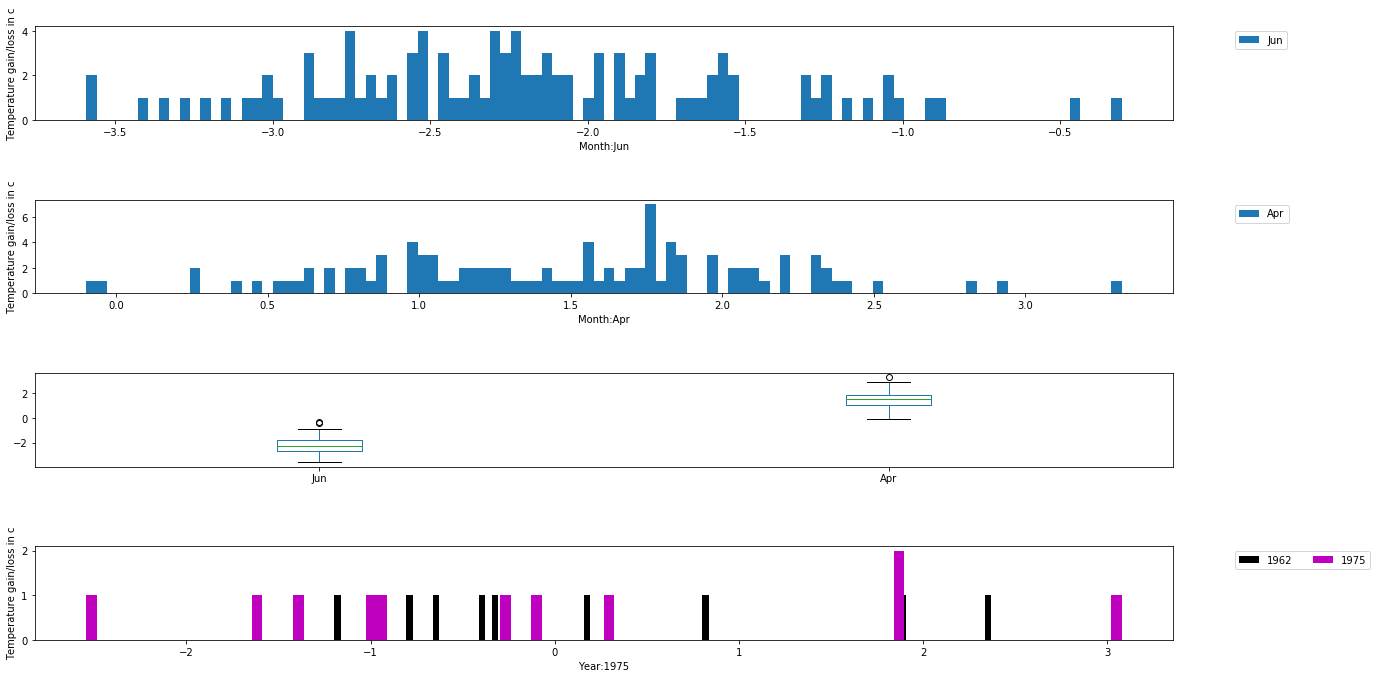

In [278]:
fig, axes = plt.subplots(4)
fig.tight_layout()
def hist_month_plots(dfc_diff_c, month, ax, bins=5):
     dfc_diff_c[month].plot(kind='hist', ax=ax, figsize=(18,10), bins=bins)
     ax.set_ylabel('Temperature gain/loss in c')
     ax.set_xlabel('Month:{}'.format(month))
     ax.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=5)
    
hist_month_plots(dfc_diff_c, 'Jun', ax=axes[0], bins=100)    
hist_month_plots(dfc_diff_c, 'Apr', ax=axes[1], bins=100)    
# try box plot
dfc_diff_c[['Jun', 'Apr']].plot.box(ax=axes[2])

def hist_year_plots(dfc_diff_c, year, ax, bins=5, color='k'):
     dfc_diff_c.loc[year].plot(kind='hist', ax=ax, figsize=(18,10), color=color, bins=bins)
     ax.set_ylabel('Temperature gain/loss in c')
     ax.set_xlabel('Year:{}'.format(year))
     ax.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=5)

hist_year_plots(dfc_diff_c, 1962, ax=axes[3], bins=100)    
hist_year_plots(dfc_diff_c, 1975, ax=axes[3], bins=100, color='m')    
 

plt.show()


### Task 4 - Insight

- Visually represent the varying temperatures over the entire period.
- Find the coldest and warmest months for May over the entire period.